In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/Pyter/DA/BaiTap/house_price_Dống-Da_Hà-Nội_subdata.csv',header=0)
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [3]:
data.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


In [4]:
# Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
for index, column in enumerate(data.columns):
    temp = data.loc[:,column].isna()
    if temp.sum() > 0:
        print('cột ' , data.columns[index], ' chứa ' , temp.sum() , ' giá trị KT')
print('Tổng số lượng dòng có chứa giá trị khuyết thiếu là: ', data.shape[0] - data.dropna().shape[0])

cột  area  chứa  6  giá trị KT
cột  price  chứa  54  giá trị KT
cột  land_certificate  chứa  302  giá trị KT
cột  house_direction  chứa  629  giá trị KT
cột  balcony_direction  chứa  647  giá trị KT
cột  toilet  chứa  431  giá trị KT
cột  bedroom  chứa  351  giá trị KT
cột  floor  chứa  305  giá trị KT
Tổng số lượng dòng có chứa giá trị khuyết thiếu là:  657


In [5]:
# Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
data.dropna(subset=['price'], inplace=True)

In [6]:
# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”,
# house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó
values = {'land_certificate':'không có thông tin'}
data.fillna(value=values, inplace=True)

In [7]:
values = {'house_direction':data.loc[:,'house_direction'].mode()[0],
         'balcony_direction':data.loc[:,'balcony_direction'].mode()[0],
         'toilet':data.loc[:,'toilet'].mode()[0],
         'bedroom':data.loc[:,'bedroom'].mode()[0],
         'floor':data.loc[:,'floor'].mode()[0]}
data.fillna(value=values, inplace=True)
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


In [18]:
# Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ
nhango = data[(data['property_type']=='trong ngo')]
nhango

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo


In [20]:
# Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ
nhango['giá (triệu/m2)'] = nhango['price'] / nhango['area']
nhango.dropna(subset = ['giá (triệu/m2)'], inplace = True)
nhango

C:\Users\Pyter\AppData\Local\Temp\ipykernel_6532\3023573031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhango['giá (triệu/m2)'] = nhango['price'] / nhango['area']
C:\Users\Pyter\AppData\Local\Temp\ipykernel_6532\3023573031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhango.dropna(subset = ['giá (triệu/m2)'], inplace = True)


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá (triệu/m2)
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo,355.555556
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


In [11]:
# Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR
# Thực hiện loại bỏ các dòng dữ liệu ngoại lai
a = nhango.loc[:,['area','giá (triệu/m2)']]
Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)
IQR = Q3 - Q1
b = nhango[~((a < (Q1 - 1.5 * IQR)) | (a > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Số giá trị ngoại lai bị bỏ đi là {nhango.shape[0]-b.shape[0]}')

Số giá trị ngoại lai bị bỏ đi là 53


In [26]:
b

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá (triệu/m2)
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,114.000000
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


In [29]:
nhango[['area','giá (triệu/m2)']]

,area,giá (triệu/m2)
0,50.0,294.000000
1,57.0,73.684211
2,62.0,177.419355
3,26.0,111.538462
4,40.0,98.750000
...,...,...
444,90.0,355.555556
445,58.0,272.413793
446,96.0,106.250000
447,38.0,102.631579


In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
ss = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()

sss = ss.fit_transform(pd.DataFrame(b['giá (triệu/m2)']))
mms = mm.fit_transform(pd.DataFrame(b['giá (triệu/m2)']))
rbs = rs.fit_transform(pd.DataFrame(b['giá (triệu/m2)']))

col_names = list(pd.DataFrame(b['giá (triệu/m2)']).columns)
sss = pd.DataFrame(sss, columns=col_names)

col_names1 = list(pd.DataFrame(b['giá (triệu/m2)']).columns)
mms = pd.DataFrame(mms, columns=col_names1)

col_names2 = list(pd.DataFrame(b['giá (triệu/m2)']).columns)
rbs = pd.DataFrame(rbs, columns=col_names2)


In [39]:
b

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá (triệu/m2)
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,114.000000
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


<AxesSubplot:xlabel='price', ylabel='Density'>

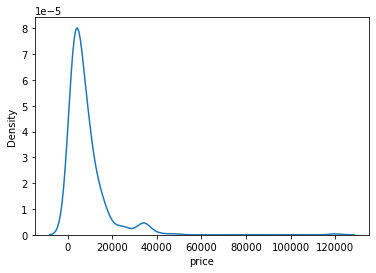

In [37]:
import seaborn as sns

sns.kdeplot(data=nhango['price'])

<AxesSubplot:ylabel='Density'>

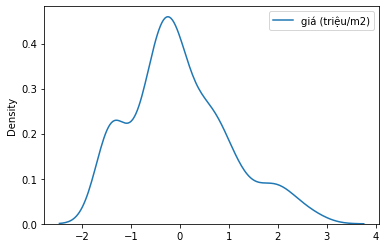

In [38]:
sns.kdeplot(data=sss)

In [34]:
rbs

,giá (triệu/m2)
0,2.158510
1,-0.523185
2,0.739485
3,-0.062421
4,-0.218083
...,...
348,-0.032459
349,1.895762
350,-0.126792
351,-0.170836
